In [4]:
from rsl_depth_completion.data.components import raw_data_loaders as dl
from rsl_depth_completion.data.components import camera_calibration as calib

In [5]:
sparse_dm = dl.depth_read("/media/master/wext/cv_data/kitti-full/data/kitti_depth_completion/validation/sparse_depth/2011_09_26_drive_0002_sync_velodyne_raw_0000000005_image_02.png")
gt = dl.depth_read("/media/master/wext/cv_data/kitti-full/data/kitti_depth_completion/validation/ground_truth/2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png")
rgb_image=dl.img_read("/media/master/wext/cv_data/kitti-full/data/kitti_depth_completion/validation/image/2011_09_26_drive_0002_sync_image_0000000005_image_02.png")
intrinsics = calib.load_calib("/media/master/wext/msc_studies/second_semester/research_project/project/rsl_depth_completion/data/kitti-calibration")

In [6]:
import matplotlib.pyplot as plt
import numpy as np


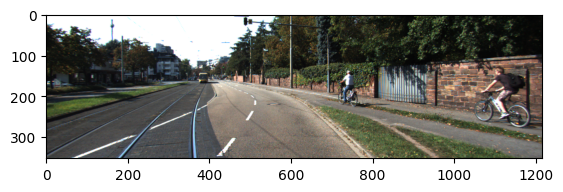

In [7]:
plt.imshow(rgb_image)

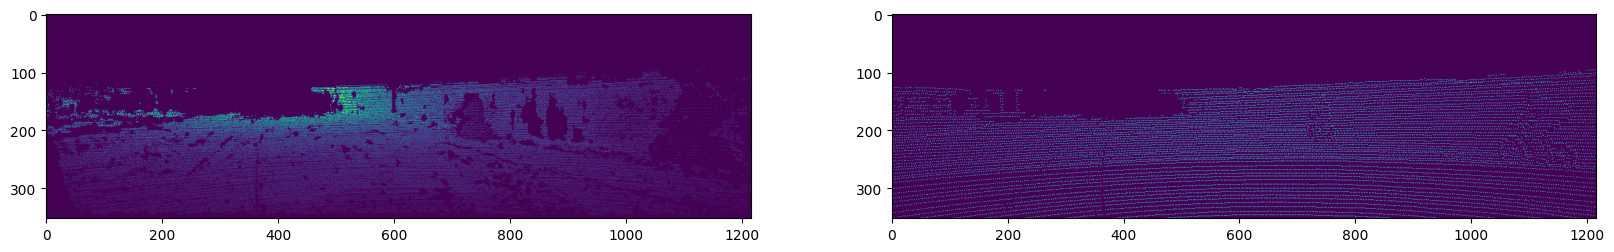

In [8]:
import torch


fix, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(gt)
sdm = np.where(sparse_dm > 0, 1, 0)
ax[1].imshow(sdm, )

In [6]:
import torch

torch.save(torch.from_numpy(sparse_dm.astype('float32')).permute(2,0,1), "/media/master/wext/msc_studies/second_semester/research_project/project/rsl_depth_completion/rsl_depth_completion/conditional_diffusion/sparse_dm.pt")
torch.save(torch.from_numpy(rgb_image.astype('float32')).permute(2,0,1), "/media/master/wext/msc_studies/second_semester/research_project/project/rsl_depth_completion/rsl_depth_completion/conditional_diffusion/rgb_image.pt")

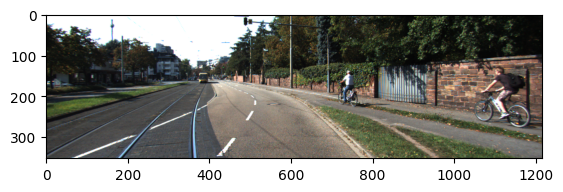

In [7]:
import torch
plt.imshow(torch.load("/media/master/wext/msc_studies/second_semester/research_project/project/rsl_depth_completion/rsl_depth_completion/conditional_diffusion/rgb_image.pt").numpy().transpose(1,2,0)/255)

In [8]:
torch.save(torch.from_numpy(sparse_dm.astype('float32').transpose(2,0,1)), "/media/master/wext/msc_studies/second_semester/research_project/project/rsl_depth_completion/rsl_depth_completion/conditional_diffusion/sparse_dm.pt")

In [9]:
max_depth=80.0
loaded_rgb_image = torch.load(
    "./rgb_image.pt"
)
loaded_sparse_dm = (
    torch.load(
        "./sparse_dm.pt"
    )
    / max_depth
)

In [10]:
loaded_rgb_image.max()

tensor(255.)

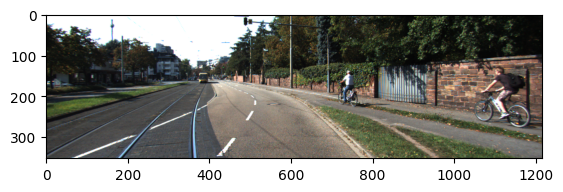

In [11]:
plt.imshow(loaded_rgb_image.numpy().transpose(1,2,0)/255)

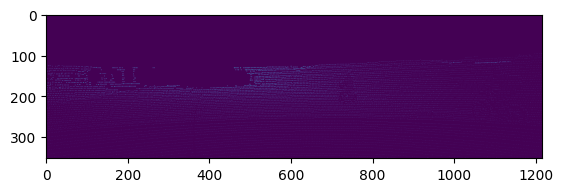

In [12]:
plt.imshow(loaded_sparse_dm.numpy().transpose(1,2,0)/80)